In [1]:
#set up the dmipy model 
#make ball-stick model in dmipy
from dmipy.signal_models import cylinder_models, gaussian_models
from dmipy.core.modeling_framework import MultiCompartmentModel
ball = gaussian_models.G1Ball()
stick = cylinder_models.C1Stick()
ballstick_mod = MultiCompartmentModel(models=[stick, ball])




/Users/paddyslator/anaconda/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


We highly recommend installing pathos to take advantage of multicore processing.


In [2]:
import numpy as np

#load acquisition parameters
datadir = '../Connecthon_WAND/charmed_train/derivatives/dwi/sub-06400/'

bvals = np.loadtxt(datadir + "314_06400_CHARMED_2.bval")
bvecs = np.loadtxt(datadir + "bvec.eddy_rotated_bvec")

bvecs = np.transpose(bvecs)


In [3]:
#set up the dmipy acquisition scheme
from dmipy.core.acquisition_scheme import acquisition_scheme_from_bvalues
#these are just made up some values
delta = 0.0106  
Delta = 0.0431 
acq_scheme = acquisition_scheme_from_bvalues(bvals*1e6, bvecs, delta, Delta)



In [4]:
acq_scheme.print_acquisition_info

Acquisition scheme summary

total number of measurements: 266
number of b0 measurements: 13
number of DWI shells: 6

shell_index |# of DWIs |bvalue [s/mm^2] |gradient strength [mT/m] |delta [ms] |Delta[ms] |TE[ms]
0           |13        |0               |0                        |10.6       |43.1      |N/A  
1           |20        |200             |25                       |10.6       |43.1      |N/A  
2           |20        |500             |39                       |10.6       |43.1      |N/A  
3           |30        |1200            |61                       |10.6       |43.1      |N/A  
4           |61        |2400            |86                       |10.6       |43.1      |N/A  
5           |61        |4000            |112                      |10.6       |43.1      |N/A  
6           |61        |6000            |137                      |10.6       |43.1      |N/A  


In [9]:
from simulations import simulate_training_signals

simulated_signal,ground_truth_param_vec = simulate_training_signals(ballstick_mod,acq_scheme,1000)



In [29]:
#save the signals and ground truth
data = {}
data['simulated_signal'] = simulated_signal
data['ground_truth_param_vec'] = ground_truth_param_vec
np.save('tests/simulated_data_ball_stick', data, allow_pickle=True)
        

In [10]:
#check that things are working ok with a dmipy model fit 
ballstick_fit = ballstick_mod.fit(acq_scheme,simulated_signal)



Setup brute2fine optimizer in 0.22795391082763672 seconds
Fitting of 1000 voxels complete in 24.913813829421997 seconds.
Average of 0.024913813829421996 seconds per voxel.


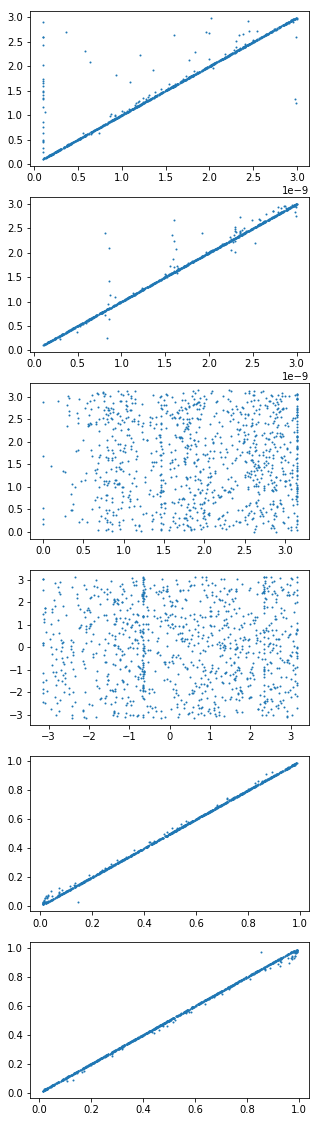

In [11]:
import matplotlib.pyplot as plt

nparam = sum(ballstick_mod.parameter_cardinality.values())

fig, ax = plt.subplots(nparam, 1, figsize=(5,20))

for i in range(0,nparam):
    ax[i].plot(ballstick_fit.fitted_parameters_vector[:,i],ground_truth_param_vec[:,i],'o',markersize=1)